In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
subj_list = ['sub-01', 'sub-04', 'sub-05', 'sub-06']
sess_list = ['ses-01']

analysis_path = '/home/malte/Documents/Projects/dMRS_starting_data_cristina/CristinasTestData/derivatives/analysis_all_models'

free_parameters = {}
for subj in subj_list:
    free_parameters[subj] = {}
    for sess in sess_list:
        free_parameters[subj][sess] = pd.read_csv(os.path.join(analysis_path, subj, sess, 'dmrs','dyn_fit_callaghan', 'free_parameters.csv'))

In [3]:
metabolite_list = ['Cr', 'Ins', 'Glu', 'GPC', 'NAA', 'PCho', 'PCr'] # according to Marco Palombo the metabolites with highest cell specificity.#['Cho','Cr', 'Ins', 'Glu', 'GPC', 'NAA', 'PCho', 'PCr'] # according to Marco Palombo the metabolites with highest cell specificity.

In [4]:
free_parameters[subj][sess]['mean'][free_parameters[subj][sess]['Unnamed: 0']== 'conc_Cr_c_amp']

6    5.24365
Name: mean, dtype: float64

In [105]:
free_parameters[subj][sess]

,Unnamed: 0,mean,sd
0,conc_Ala_c_amp,3.387047,0.342981
1,conc_Ala_c_adc,1.164789,0.243217
2,conc_Asc_c_amp,19.236456,0.724664
3,conc_Asc_c_adc,0.498481,0.066358
4,conc_Asp_c_amp,8.834175,0.603918
...,...,...,...
79,baseline_2_b_adc,0.104337,0.028890
80,baseline_2_b_off,0.149286,0.052510
81,baseline_3_b_amp,-1.047291,0.082355
82,baseline_3_b_adc,0.015901,0.005174


In [61]:
def plot_variable(variable_name):
    for i,metab in enumerate(metabolite_list):
        plt.gca().set_prop_cycle(None)
        for j,subj in enumerate(subj_list):
            for sess in sess_list:
                plt.errorbar(x=i-.1+.05*j,
                         y=free_parameters[subj][sess]['mean'][free_parameters[subj][sess]['Unnamed: 0']== 'conc_'+metab+'_'+variable_name].to_numpy(),
                          yerr=free_parameters[subj][sess]['sd'][free_parameters[subj][sess]['Unnamed: 0']== 'conc_'+metab+'_'+variable_name].to_numpy(),
                              marker='x',
                             alpha=1)
    plt.xticks(range(len(metabolite_list)),metabolite_list)
    return plt.show()

In [62]:
def plot_relative_concentration(variable_name='c_amp'):
    for i,metab in enumerate(metabolite_list):
        plt.gca().set_prop_cycle(None)
        for j,subj in enumerate(subj_list):
            for sess in sess_list:
                plt.errorbar(x=i-.2+.1*j,
                         y=free_parameters[subj][sess]['mean'][free_parameters[subj][sess]['Unnamed: 0']== 'conc_'+metab+'_'+variable_name].to_numpy()/free_parameters[subj][sess]['mean'][free_parameters[subj][sess]['Unnamed: 0']== 'conc_'+'Cr'+'_'+variable_name].to_numpy(),
                          yerr=free_parameters[subj][sess]['sd'][free_parameters[subj][sess]['Unnamed: 0']== 'conc_'+metab+'_'+variable_name].to_numpy(),
                              marker='x',
                             alpha=1)
    plt.xticks(range(len(metabolite_list)),metabolite_list)
    return plt.show()

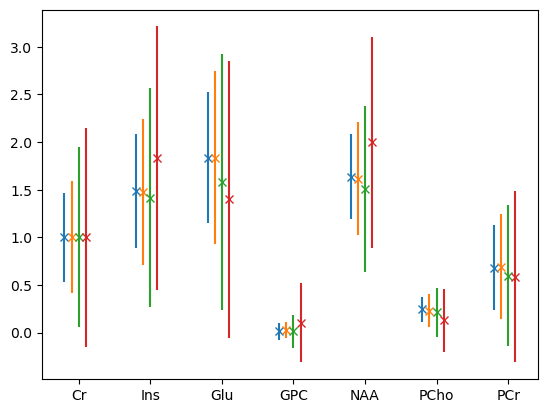

In [63]:

plot_relative_concentration()

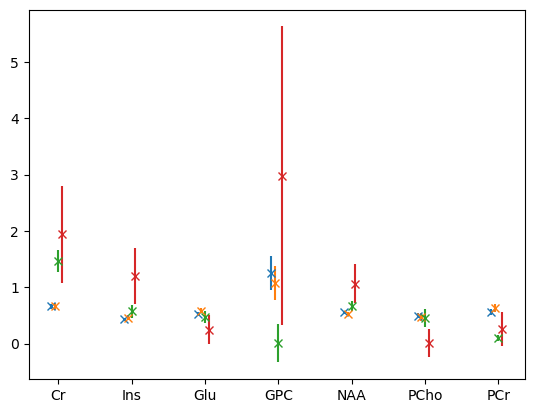

In [64]:
plot_variable('c_adc')